# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dafi' Andinil Haqqi
- **Email:** dafiaddin@gmail.com
- **ID Dicoding:** addinalhaq

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren kualitas udara pada daerah Changping?
- Pertanyaan 2: Bagaimana korelasi antar parameter udara?


## Import Semua Packages/Library yang Digunakan

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Data Wrangling

### Gathering Data

In [135]:
#Import dataset (Changping)
df = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

In [136]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [137]:
#Check jumlah row dan column
print("Jumlah row\t: ", df.shape[0])
print("Jumlah column\t: ", df.shape[1])

Jumlah row	:  35064
Jumlah column	:  18


In [138]:
#Check duplikasi
print("Duplicated data\t:",df.duplicated().sum())

Duplicated data	: 0


In [139]:
#Check baris kosong(null)
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

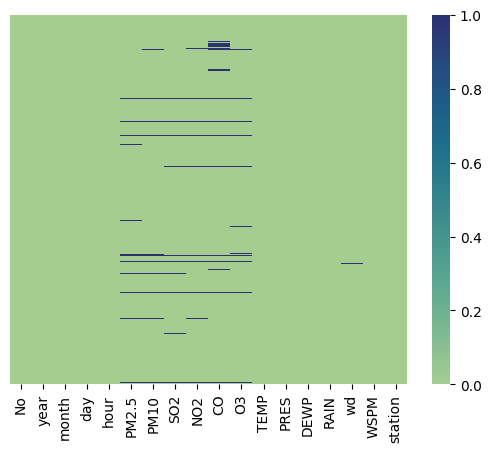

In [140]:
#Check null dengan heatmap
sns.heatmap(df.isna(),yticklabels=False, cmap='crest')
plt.show()

- Data wd bertipe object, dan data berdasarkan value riil, maka column ini akan dihapus.
- Data station memiliki value yang sama, maka column ini akan dihapus
- Dalam data ini tidak terdapat null values yang dominan sehingga tidak memungkinkan menggunakan drop column (selain column wd karena bertipe object).
- Karena data berdasarkan value riil, maka null values di-handling menggunakan metode imputation dengan mean value. 

In [141]:
#Check numerical properties (mean,std,min,max,IQR)
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

- Konversi datetime

In [142]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']],dayfirst=True)
df.set_index('datetime')
df = df.drop(['No','year','month','day','hour'], axis = 1)
df


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping,2017-02-28 19:00:00
35060,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,2017-02-28 20:00:00
35061,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,2017-02-28 21:00:00
35062,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,2017-02-28 22:00:00


- Menghapus column wd dan station dengan drop column

In [143]:
#Drop column wd
df.drop(columns=['wd'],inplace=True)

In [144]:
df.drop(columns=['station'],inplace=True)

- Mengatasi Null Values dengan mean tiap column

In [145]:
#Check baris kosong(null)
df.isna().sum()

PM2.5        774
PM10         582
SO2          628
NO2          667
CO          1521
O3           604
TEMP          53
PRES          50
DEWP          53
RAIN          51
WSPM          43
datetime       0
dtype: int64

In [146]:
col = ['PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for i in col:
    df[i] = df[i].fillna(df[i].mean())
    
df.isna().sum()

PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
datetime    0
dtype: int64

In [147]:
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,0.5,2013-03-01 00:00:00
1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,0.7,2013-03-01 01:00:00
2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,0.2,2013-03-01 02:00:00
3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,1.0,2013-03-01 03:00:00
4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,2.1,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,28.0,47.0,4.0,14.0,300.0,57.940003,11.7,1008.9,-13.3,0.0,1.3,2017-02-28 19:00:00
35060,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,2.1,2017-02-28 20:00:00
35061,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,1.5,2017-02-28 21:00:00
35062,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,1.4,2017-02-28 22:00:00


#### Maka dengan demikian null value telah berhasil diatasi

- Mengecek outlier

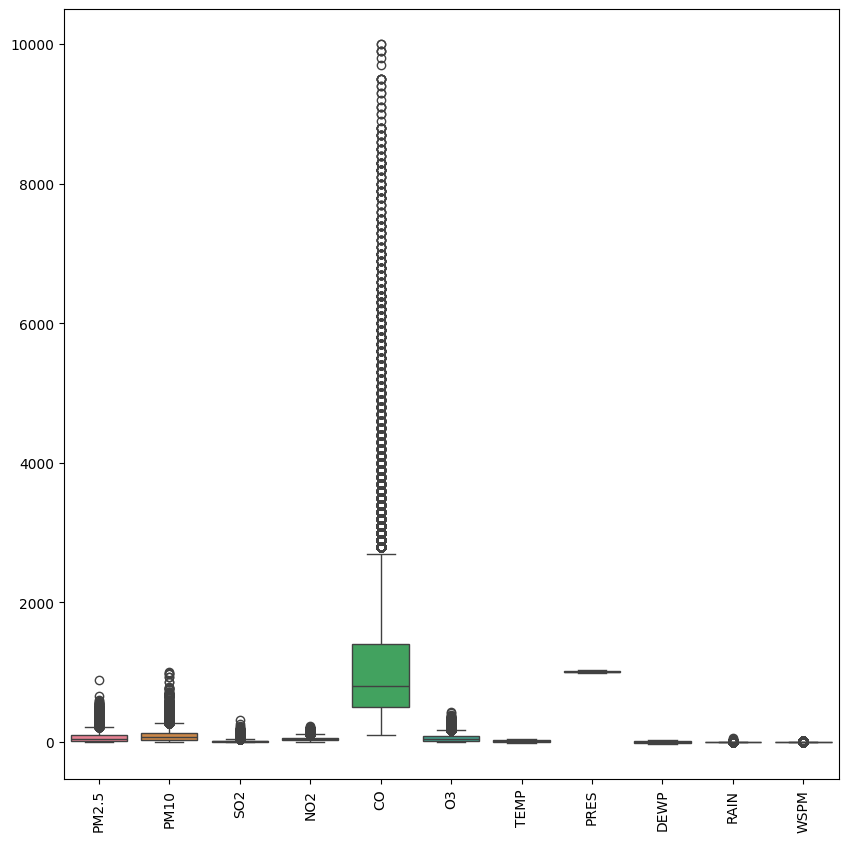

In [148]:
#Check outlier dengan boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df[col])
plt.xticks(rotation='vertical')
plt.show()

In [149]:
#Mengecek IQR 
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3-Q1
print("Diperoleh IQR:\n",IQR)

Diperoleh IQR:
 PM2.5     80.0
PM10      95.0
SO2       16.0
NO2       38.0
CO       900.0
O3        63.0
TEMP      19.9
PRES      16.7
DEWP      24.4
RAIN       0.0
WSPM       1.3
dtype: float64


In [150]:
#Mengatasi outlier
#Jika value di bawah (Q1 -(1,5 * IQR)) atau di atas (Q3 - 1,5 * IQR) maka didefinisikan sebagai outlier
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

PM2.5    1807
PM10     1405
SO2      3136
NO2       799
CO       2590
O3       1697
TEMP        0
PRES        0
DEWP        0
RAIN     1401
WSPM     2382
dtype: int64

- Dikarenakan nilai mean terpengaruh oleh outlier, maka digunakan nilai median untuk mengatasi outlier

In [151]:
mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
mask

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,False


In [152]:
#Mengganti nilai outlier dengan median
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

#### Outlier telah diatasi dengan menggunakan nilai median

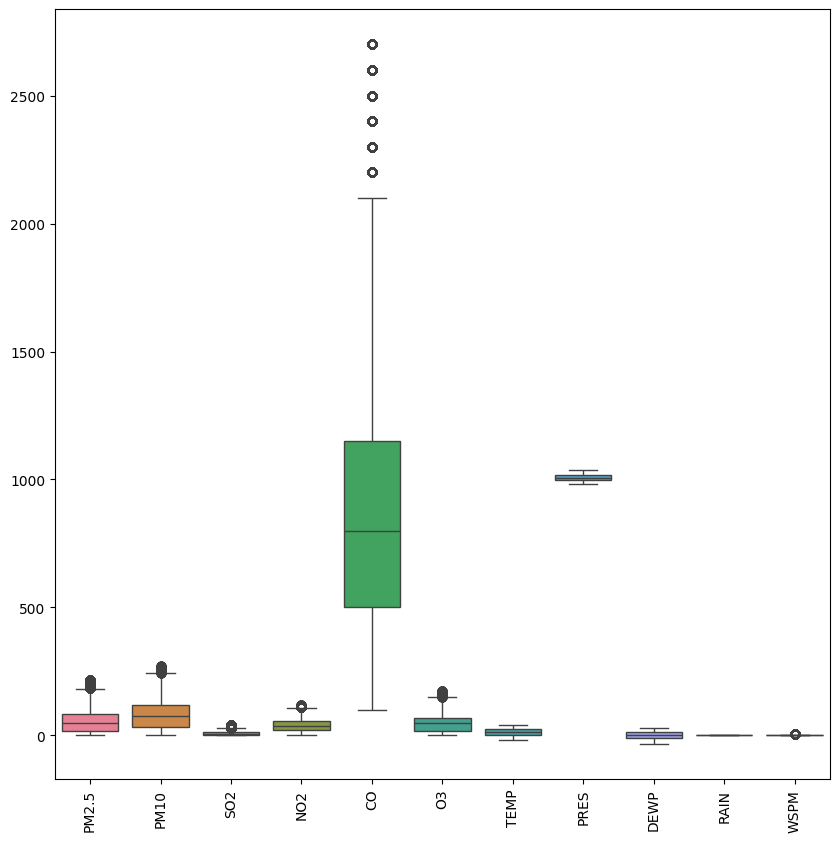

In [153]:
#Check ulang outlier dengan boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df[col])
plt.xticks(rotation='vertical')
plt.show()

## Exploratory Data Analysis (EDA)

### Explore ...

- Mencari korelasi antar parameter

In [154]:
#Menggunakan korelasi Pearson
df[col].corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.769969,0.246651,0.515106,0.586339,-0.142474,-0.019258,-0.060267,0.186609,NaN,-0.200380
PM10,0.769969,1.000000,0.274928,0.551962,0.525731,-0.116207,-0.027295,-0.059937,0.099227,NaN,-0.164127
SO2,0.246651,0.274928,1.000000,0.308562,0.305860,-0.160226,-0.284599,0.245497,-0.294480,NaN,-0.008078
NO2,0.515106,0.551962,0.308562,1.000000,0.543390,-0.502454,-0.347444,0.247922,-0.139313,NaN,-0.291056
CO,0.586339,0.525731,0.305860,0.543390,1.000000,-0.286916,-0.175407,0.102210,0.056504,NaN,-0.235977
O3,-0.142474,-0.116207,-0.160226,-0.502454,-0.286916,1.000000,0.548921,-0.436486,0.292685,NaN,0.274578
TEMP,-0.019258,-0.027295,-0.284599,-0.347444,-0.175407,0.548921,1.000000,-0.837764,0.823684,NaN,0.120829
PRES,-0.060267,-0.059937,0.245497,0.247922,0.102210,-0.436486,-0.837764,1.000000,-0.765585,NaN,0.004931
DEWP,0.186609,0.099227,-0.294480,-0.139313,0.056504,0.292685,0.823684,-0.765585,1.000000,NaN,-0.158035
RAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan korelasi Pearson, parameter RAIN tidak memiliki korelasi karena didefinisikan sebagai Not a Number (NaN), selain parameter tersebut setiap parameter memiliki korelasi satu sama lain. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara pada daerah Changping?


- Tren Daily

<Axes: title={'center': 'Daily Air Quality Trends'}, xlabel='time'>

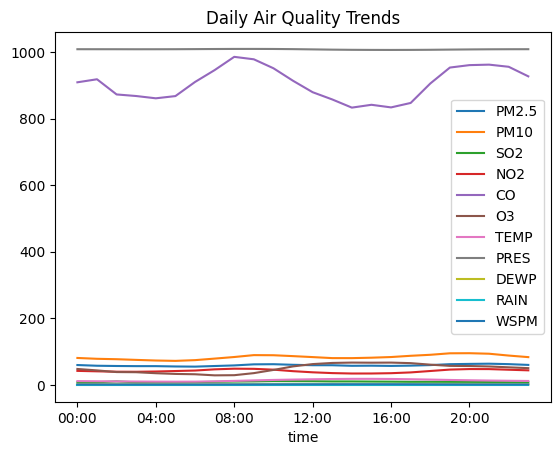

In [177]:
time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
time.plot(xticks=hourly_ticks, title = 'Daily Air Quality Trends')

Kadar CO paling tinggi terdapat pada pagi hari, dan cenderung tinggi pada malam hari.


Kadar NO2 cenderung menurun di sore hari.


Kadar O3 cenderung meningkat di siang hari.


### Pertanyaan 2: Bagaimana korelasi antar parameter udara?

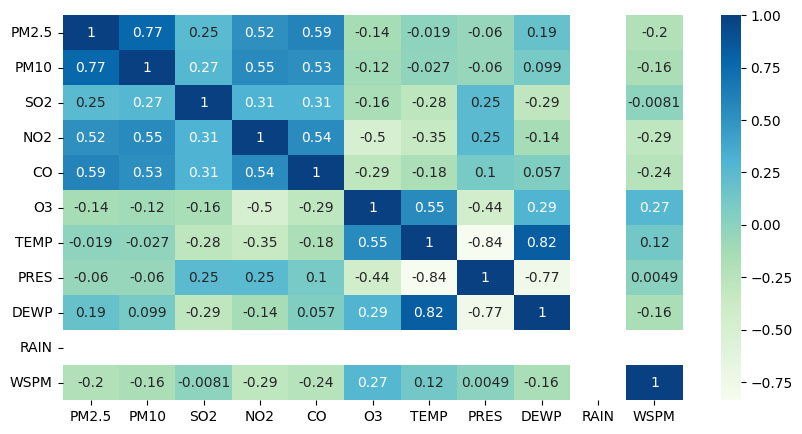

In [158]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='GnBu',annot=True)
plt.show()

Column WPSM, PRES, dan O3 cenderung tidak memiliki korelasi yang kuat dengan parameter lain

PM2.5 dan PM10 memiliki korelasi yang cenderung kuat dengan keseluruhan parameter

## Conclusion

- Conclusion pertanyaan 1:


1. Kadar CO pada pagi hari dan malam hari menunjukkan bahwa terjadi lonjakan pada jam berangkat dan jam pulang kerja.

2. Kadar O3 cenderung meningkat pada siang hari, hal ini menunjukkan bahwa alat ukur/sensor ukur bekerja dengan baik.

- Conclusion pertanyaan 2:

1. PM2.5 dan PM10 menjadi dependant variable apabila dilakukan pengolahan lebih lanjut karena memiliki korelasi kuat terhadap keseluruhan parameter.